<img style="float:top,right" src="Logo.png" width="400">

<br><br>

# Welcome to the KinMS example notebook  

<br><br>

### Here you will learn how to import and use KinMS to generate interferometric data cubes and gain a better understanding of using the functionalities within the package.

---

Copyright (C) 2016, Timothy A. Davis
E-mail: DavisT -at- cardiff.ac.uk

---


### HOUSEKEEPING

Firstly, we want to import the KinMS package and instantiate the class so that we can freely use it throughout this example notebook.

In [1]:
from KinMS import KinMS

Instantiate the model

In [2]:
f = KinMS()

Lastly we're going to need some more basic Python packages as well as the premade colourmap for viewing velocity maps found in $\texttt{sauron_colormap}$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sauron_colormap import sauron

---

## Example 1.

### Lets try making a data cube by providing the class with the physical attributes necessary for descibing a simple exponential disk. 

First lets start by creating a surface brightness profile which decays radially  

In [4]:
extent = 64
scale_length = extent/4
x = np.arange(0,extent,0.01)
fx = np.exp(-x/scale_length)

Next, lets make the velocity profile as a function of radius $\text{v}(\text{r})=\sqrt{\text{r}}$

In [5]:
velrad = x
vel = np.sqrt(velrad)

Although not necessary, we may also wish to provide our class with the position angle and inclination angle of our galaxy. We do that here by defining $\texttt{pos}$ and $\texttt{inc}$ respectively.

In [6]:
pos = 5
inc= 75

Now we need to define the properties of the data cube which we would like to return, including the physical dimensions, channel width, and beam size.

In [7]:
xsize=128
ysize=128
vsize=640
cellsize=1.0
dv=10
beamsize=[4.,4.,0.]

Finally, we provide all of the parameters defined above to the class which returns the modelled data cube. 

In [8]:
cube = f(xsize,ysize,vsize,cellsize,dv,beamSize=beamsize,inc=inc,sbProf=fx,
             sbRad=x,velProf=vel,velRad=x,posAng=pos,verbose=False)        

If we sum the datacube along the velocity axis we can get a good idea of the shape of the galaxy we just created. 

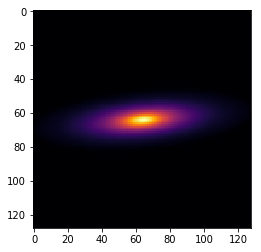

In [15]:
flattened = cube.sum(axis=2)
plt.figure()
plt.imshow(flattened,cmap='inferno')

---

## Example 2.
